In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
datasets = pd.read_csv('new_outputt.csv')

Saving new_outputt.csv to new_outputt.csv


In [7]:
print(datasets.shape)


(855015, 6)


In [10]:
datasets.head(5)

chromosome number  ...  fraction of reads have dna methylation
0                 15  ...                                0.416667
1                 15  ...                                0.914286
2                 15  ...                                0.670732
3                 15  ...                                0.978495
4                 15  ...                                0.756522

[5 rows x 6 columns]

In [0]:
X = datasets.iloc[:,[1,2,3]].values
Y = datasets.iloc[:,5].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=101)


In [14]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [-2.31355968e-10 -2.31355968e-10]


In [0]:
# Predicting the Test set result ￼

Y_Pred = regressor.predict(X_Test)

In [17]:
Y_Pred

array([0.73662673, 0.72099757, 0.73000345, ..., 0.72944503, 0.72339459,
       0.71744739])

In [18]:
Y_Test
import sklearn.metrics as metrics
print(metrics.mean_squared_error(Y_Test, Y_Pred))

0.08980484450107648


In [19]:
X_Test

array([[ 59387342,  59387344],
       [ 93164649,  93164651],
       [ 73701393,  73701395],
       ...,
       [ 74908244,  74908246],
       [ 87984268,  87984270],
       [100837187, 100837189]])

In [20]:
Y_Test.shape

(256505,)

In [21]:
Y_Train.shape

(598510,)

Text(0, 0.5, 'Predicted Y')

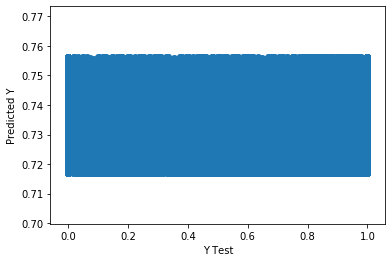

In [22]:

# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(Y_Test,Y_Pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_Test, Y_Pred))
print('MSE:', metrics.mean_squared_error(Y_Test, Y_Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))

MAE: 0.23754723525490942
MSE: 0.08980484450107648
RMSE: 0.299674564321159


In [24]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().
import seaborn as sns
sns.distplot((Y_Test-Y_Pred),bins=50);

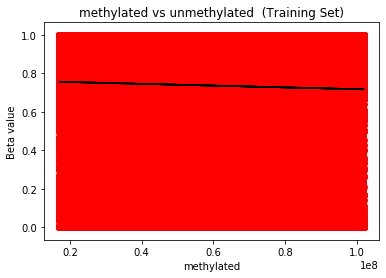

In [25]:
# Visualising the Training set results
plt.scatter(X_Train[:,0], Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'black')
plt.title('methylated vs unmethylated  (Training Set)')
plt.xlabel('position')
plt.ylabel('Beta value')
plt.show()

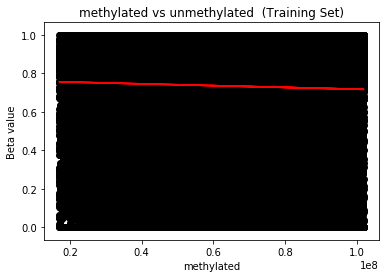

In [26]:
plt.scatter(X_Test[:,0], Y_Test, color = 'black')
plt.plot(X_Test, regressor.predict(X_Test), color = 'red')
plt.title('methylated vs unmethylated  (Training Set)')
plt.xlabel('position')
plt.ylabel('Beta value')
plt.show()

In [27]:
#Get the correlation of the columns
datasets.corr()

chromosome number  ...  fraction of reads have dna methylation
chromosome number                                     NaN  ...                                     NaN
start position                                        NaN  ...                               -0.036143
end position                                          NaN  ...                               -0.036143
number of bisulfite converted reads                   NaN  ...                               -0.749861
number of bisulfite un-converted reads                NaN  ...                                0.571538
fraction of reads have dna methylation                NaN  ...                                1.000000

[6 rows x 6 columns]

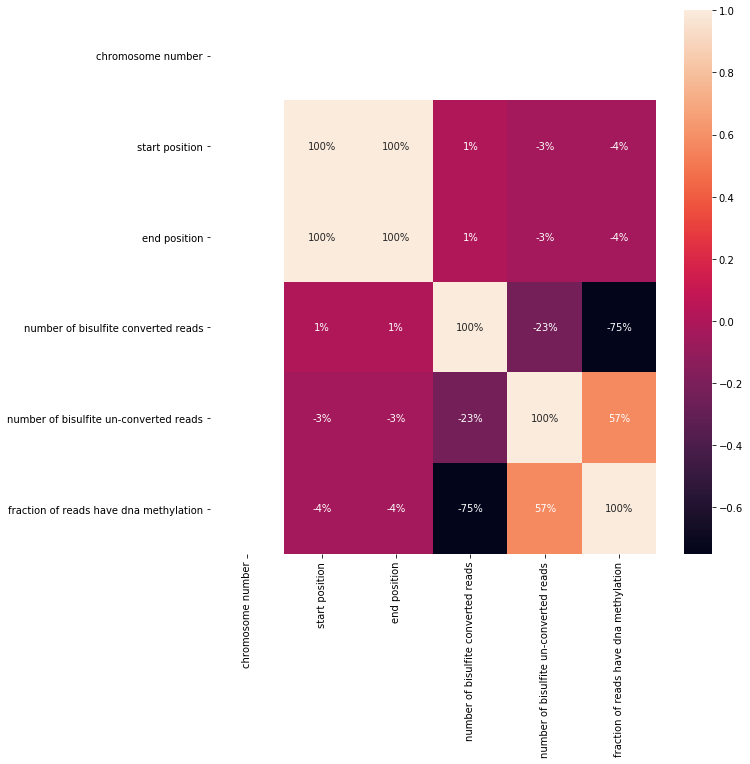

In [28]:
#Visualize the correlation by creating a heat map.
import seaborn as sns
plt.figure(figsize=(10,10))  
sns.heatmap(datasets.corr(), annot=True, fmt='.0%')

In [29]:
# print the R-squared value for the model
regressor.score(X_Train, Y_Train)

0.0013665236517667045

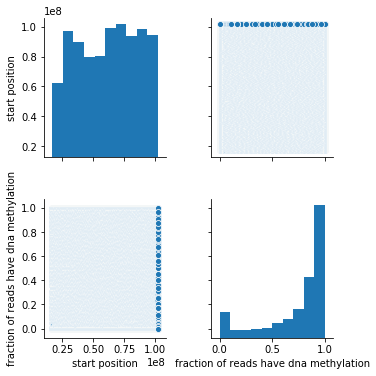

In [31]:
sns.pairplot(datasets.iloc[:,[1,5]])

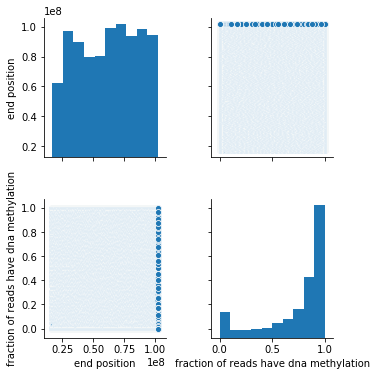

In [32]:
sns.pairplot(datasets.iloc[:,[2,5]])